## ID : 816000325
## Name: Ajay Sieunarine
## Email: ajay.sieunarine@my.uwi.edu
## Repo: https://github.com/jefroy/big-data-A4

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import LabelEncoder

plt.style.use('dark_background')
sep = '============================================================================================================='

# Forecasting (40 marks) 

## Tasks 
The "temperatureHigh" and "time" data from the weather dataset should be used for analysis. The "energy_sum" and "day" data from the energy dataset should be used for analysis. Ensure that there is only one row for a given date. 

1. Identify any trends in the datasets and discuss if trends in weather are related to trends in energy consumption. 

2. Identify Seasonal patterns in the datasets and discuss if seasonality in weather are related to seasonality in energy consumption. 

3. Forecast using simple exponential smoothing the expected temperature for 2014, use the RMS metric to indicate the accuracy of your forecast. 
    - Choose the alpha that results in the lowest RMS 
    - Plot a graph showing the actual value and the forecasted values 
    
4.	Forecast using simple exponential smoothing the expected energy consumption for 2014, use the RMS metric to indicate the accuracy of your forecast. 
    - Choose the alpha that results in the lowest RMS 
	- Plot a graph showing the actual value and the forecasted values 

5.	Combine the initial datasets using an appropriate column as the index. Indicate why you chose that index. 

6.	Plot separate graphs showing the "temperatureHigh" and "energy_sum" data from the combined dataset. 

7.	Discuss what observations can be made from the plot with the combined data vs the plots from the individual datasets. 


In [311]:
df_weatherDaily = pd.read_csv('weather_daily_darksky.csv')
print(df_weatherDaily.shape)
df_weatherDaily[['temperatureHigh', 'time']].head()

(882, 32)


,temperatureHigh,time
0,10.87,2011-11-11 00:00:00
1,8.59,2011-12-11 00:00:00
2,10.33,2011-12-27 00:00:00
3,7.36,2011-12-02 00:00:00
4,7.93,2011-12-24 00:00:00


In [312]:
df_energyData = pd.read_csv('energydata.csv')
print(df_energyData.shape)
df_energyData.head()

(36168, 9)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087


## Cleaning the data
The "temperatureHigh" and "time" data from the weather dataset should be used for analysis. The "energy_sum" and "day" data from the energy dataset should be used for analysis. Ensure that there is only one row for a given date.

For the energy dataset, it will be cleaned by adding all the energy_sum values for each day, and reorganizing the dataframe accordingly.

In [313]:
df_weather = df_weatherDaily[['temperatureHigh', 'time']].copy()
# clean the day col
df_weather.time = pd.to_datetime(df_weather.time)

# check for unique counts before we make it the index
print(df_weather['time'].describe()) # we can see that there is 1 unique date per row, hence we can use it as our index

df_weather.set_index('time', inplace=True)

print(df_weather.shape)
print(sep)
print(df_weather.describe())
print(sep)
df_weather.head()

# this data is now cleaned and indexed, and there is only 

count                     882
unique                    882
top       2012-02-14 00:00:00
freq                        1
first     2011-11-01 00:00:00
last      2014-03-30 23:00:00
Name: time, dtype: object
(882, 1)
       temperatureHigh
count       882.000000
mean         13.542392
std           6.260196
min          -0.810000
25%           9.212500
50%          12.470000
75%          17.910000
max          32.400000


,temperatureHigh
time,
2011-11-11,10.87
2011-12-11,8.59
2011-12-27,10.33
2011-12-02,7.36
2011-12-24,7.93


In [314]:
df_energy = df_energyData[['energy_sum', 'day']].copy()

# clean the day col
df_energy.day = pd.to_datetime(df_energy.day)
df_energy.set_index('day', inplace=True)

# indexes = df_energy.index.values
# print(indexes)

def debugEnergyDf():
    print(
        'energy df shape: ', df_energy.shape, 
    )
    print(sep)
    print(
        'energy df description:\n', df_energy.describe(),
        '\nenergy df data types: ', df_energy.dtypes
    )
    print(sep)
    df_energy.head()
    # the data needs to be cleaned. 
    print(df_energy['2012-11-27'].head(5), '\n', df_energy['2012-11-27'].count())
    
debugEnergyDf()

energy df shape:  (36168, 1)
energy df description:
          energy_sum
count  36168.000000
mean      10.620479
std        9.459052
min        0.000000
25%        4.604000
50%        7.293000
75%       12.932250
max      101.041000 
energy df data types:  energy_sum    float64
dtype: object
            energy_sum
day                   
2012-11-27       6.970
2012-11-27       7.571
2012-11-27       3.044
2012-11-27      22.040
2012-11-27       3.661 
 energy_sum    50
dtype: int64


In [315]:
# cleaning the energy dataframe

def getIndex(index):
    '''
    clean an index value and return a string with the first 10 characters:
    '''
    if(len(index) < 10):
        print('error getting index.')
        return 'error'
    return str(index[0:10])

'''
for each index:
    add the energy sum  
    drop all rows with that index
    append it to a new row for that index
'''

temp_dict = {}

for index, row in df_energy.iterrows():
    i = getIndex(str(index))
    val = df_energy[i].sum()
    temp_dict[index] = val

In [316]:
df_new = pd.DataFrame(data=temp_dict)
df_new = df_new.transpose()
df_energy = df_new

print(df_energy.describe())
df_energy.head()

       energy_sum
count  828.000000
mean   463.914829
std    144.837611
min      5.213000
25%    371.531250
50%    438.524500
75%    573.639000
max    888.870000


,energy_sum
2011-12-08,18.394
2011-12-09,29.975
2011-12-10,75.885
2011-12-11,82.797
2011-12-12,59.754


## Task 1 and 2
1. Identify any trends in the datasets and discuss if trends in weather are related to trends in energy consumption.
2. Identify Seasonal patterns in the datasets and discuss if seasonality in weather are related to seasonality in energy consumption. 

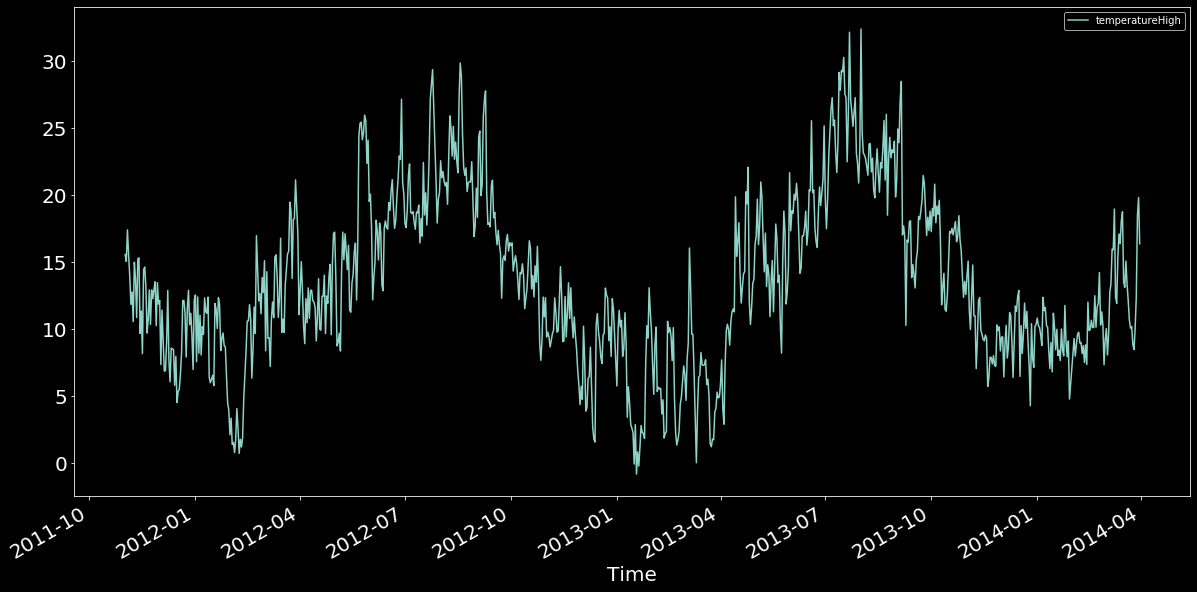

In [317]:
# plot for temperatures
df_weather.plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('Time', fontsize=20);

Text(0.5, 0, 'Year')

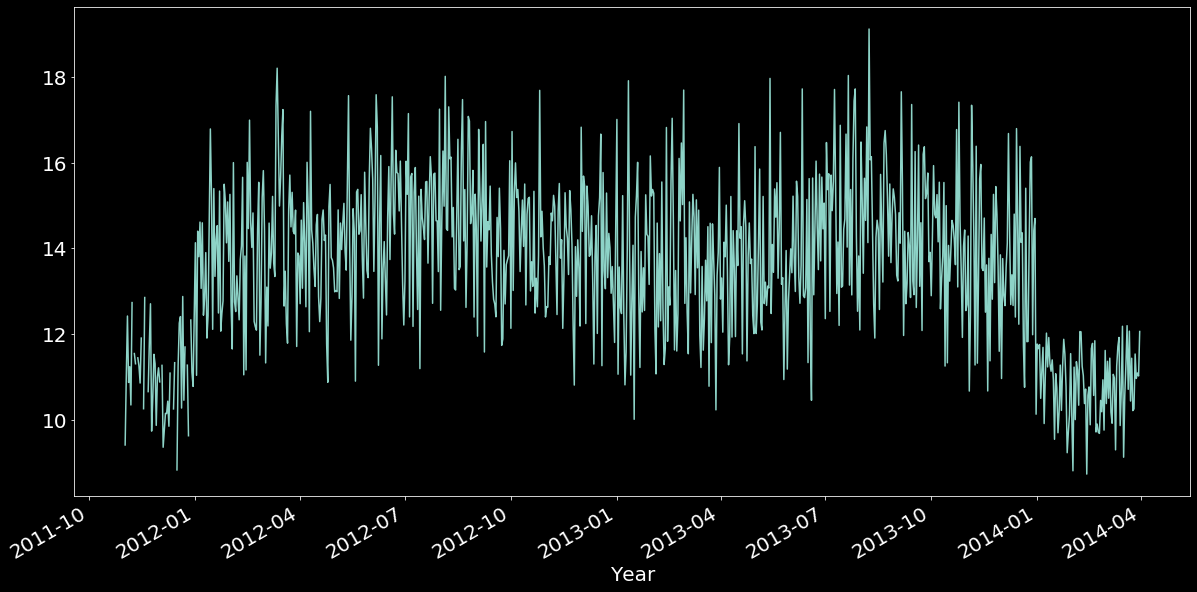

In [318]:
df_weather['temperatureHigh'].rolling(12).mean().plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('Year', fontsize=20)

### Observations:
- Trends:
    - An upward trend is present.
- There is seasonality:
    * Around the 9th month, there seem to be significant spikes in temperature.
    * From the 10th month in 2011 to the 2nd month in 2012 there is a steady decrease in the temperature. To which this leads to a steady increase till the 8th month
    * Again following a steady decrease until the 4th month of 2013 And as before there is a repeated steady increase to the 8th month in 2013
    * To which again a subsequent reduction in the y value until 1st month of 2014

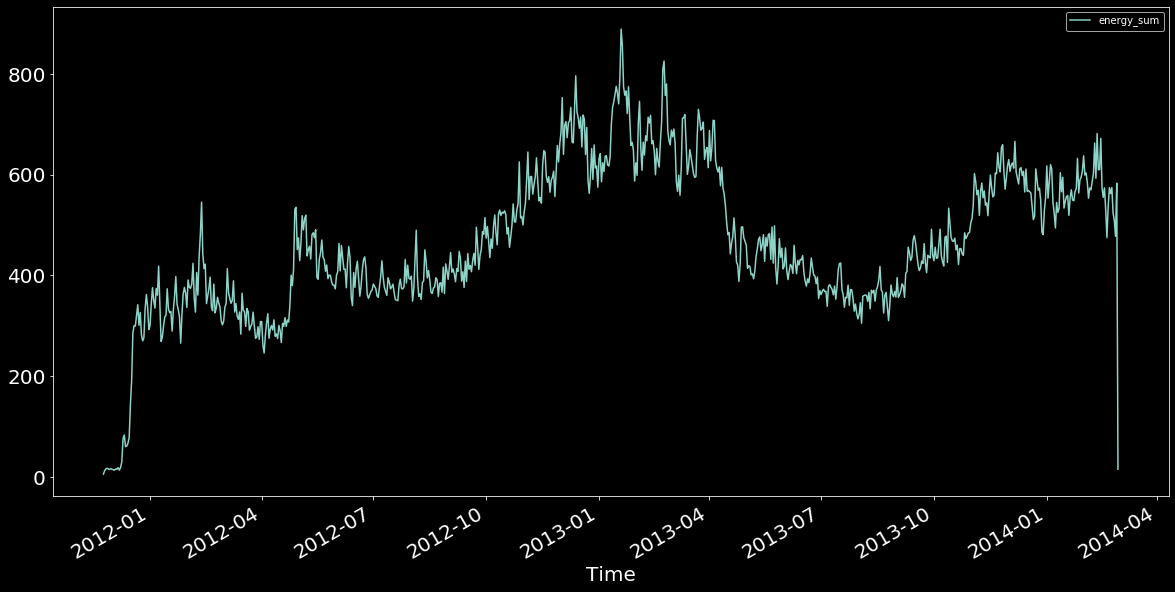

In [319]:
# plot for temperatures
df_energy.plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('Time', fontsize=20);

Text(0.5, 0, 'Year')

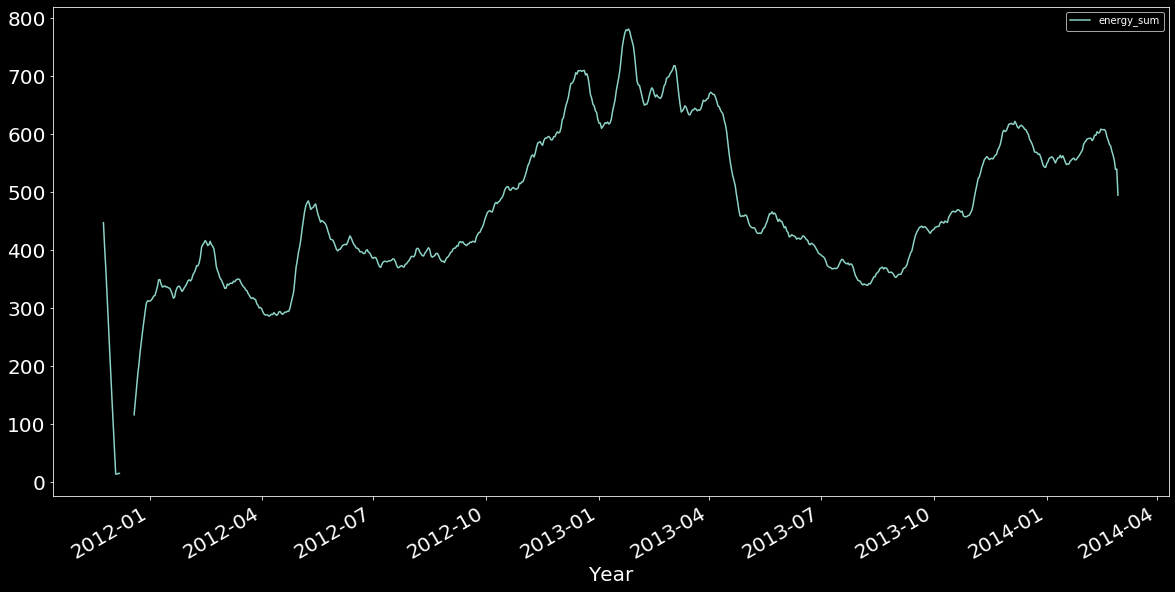

In [320]:
df_energy.rolling(12).mean().plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('Year', fontsize=20)

### Observation:
- Trends:
    - An upward trend is present.
- Seasonality:
    * For 2012:
        * from around jan to around may, the data seems to be somewhat steady, but then spikes and plateus around may.
        * around march, there is a massive spike in energy usage.
        * from may to december, the overall energy usage went up, and steadily increased until the start of 2013
    * For 2013:
        * 

## Task 3
3. Forecast using simple exponential smoothing the expected temperature for 2014, use the RMS metric to indicate the accuracy of your forecast. 
    - Choose the alpha that results in the lowest RMS 
    - Plot a graph showing the actual value and the forecasted values 

In [321]:
# get data (X)
weather = df_weather[['temperatureHigh']]
# weather['temperatureHigh'] = df_weather['temperatureHigh'].astype(np.float64)
# split data up
train = weather[weather.index.year < 2014]
test = weather[weather.index.year == 2014]
print(train.shape, test.shape)
# simple exponential smoothing using alpha
y_hat_avg = test.copy()

hoff = test['temperatureHigh'].ewm(alpha=0.6).mean()

print(hoff)
print(type(hoff))

y_hat_avg['SES'] = hoff

(792, 1) (90, 1)
time
2014-01-12     7.060000
2014-01-24     7.738571
2014-01-14     7.149744
2014-02-23    10.099409
2014-01-19     8.850980
                ...    
2014-01-26     9.971179
2014-02-27    10.174472
2014-03-09    15.451789
2014-02-12    11.478715
2014-02-15    10.531486
Name: temperatureHigh, Length: 90, dtype: float64
<class 'pandas.core.series.Series'>


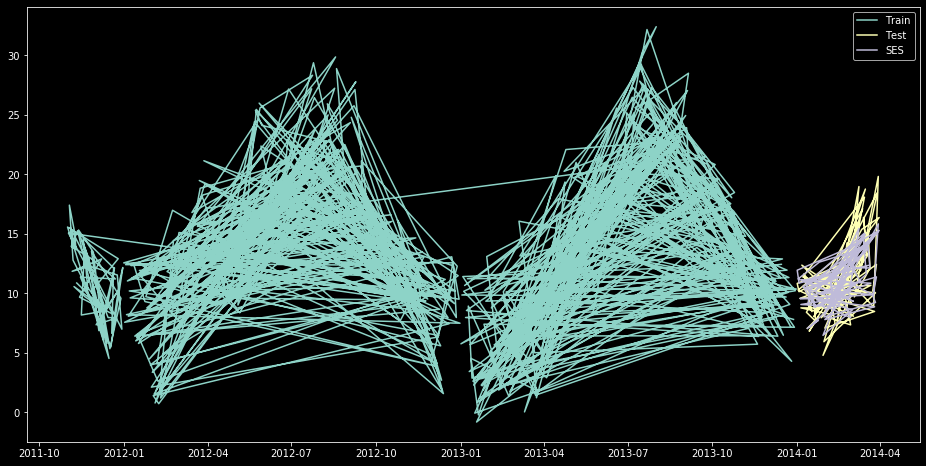

In [322]:
plt.figure(figsize=(16,8))
plt.plot(train['temperatureHigh'], label='Train')
plt.plot(test['temperatureHigh'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [323]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

1.4542459452851486


## Task 4
4.	Forecast using simple exponential smoothing the expected energy consumption for 2014, use the RMS metric to indicate the accuracy of your forecast. 
    - Choose the alpha that results in the lowest RMS 
	- Plot a graph showing the actual value and the forecasted values 

In [324]:
# get data (X)
energy = df_energy[['energy_sum']]
energy['energy_sum'] = energy['energy_sum'].astype(np.float64)
# split data up
train = energy[energy.index.year < 2014]
test = energy[energy.index.year == 2014]
print(train.shape, test.shape)
# simple exponential smoothing using alpha
y_hat_avg = test.copy()

hoff = test['energy_sum'].ewm(alpha=0.9).mean()

# print(hoff)
print(type(hoff))

y_hat_avg['SES'] = hoff

(769, 1) (59, 1)
<class 'pandas.core.series.Series'>


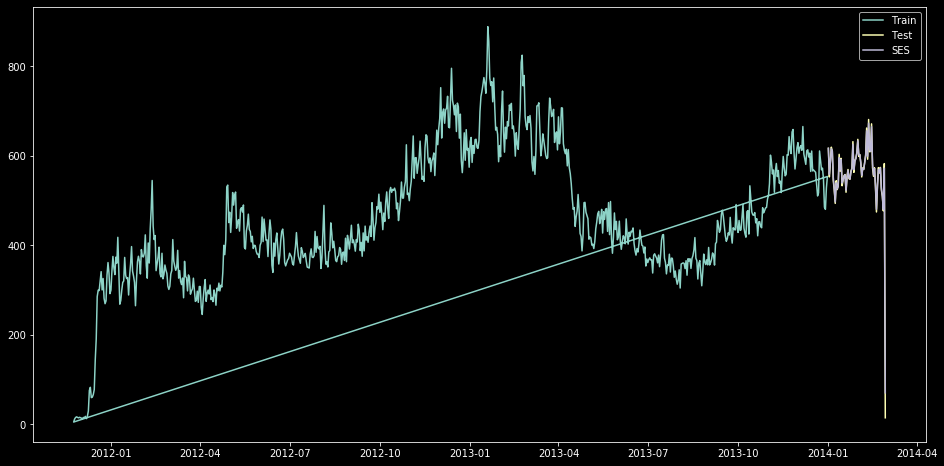

In [325]:
plt.figure(figsize=(16,8))
plt.plot(train['energy_sum'], label='Train')
plt.plot(test['energy_sum'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [326]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

8.324902250542507


## Task 5
5.	Combine the initial datasets using an appropriate column as the index. Indicate why you chose that index.

After much consideration, the best index column available, is the date column. This is the best index column since both datasets have similar date ranges. This will also allow us to easily clean the dataframe.

In [327]:
df_energyData

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087
...,...,...,...,...,...,...,...,...,...
36163,MAC005555,2014-02-24,0.1210,0.214375,1.113,48,0.251571,10.290,0.063
36164,MAC005555,2014-02-25,0.1005,0.135938,0.727,48,0.125380,6.525,0.063
36165,MAC005555,2014-02-26,0.1025,0.105271,0.212,48,0.028482,5.053,0.063
36166,MAC005555,2014-02-27,0.1000,0.107750,0.214,48,0.033595,5.172,0.062


In [329]:
print(df_weatherDaily.columns.values)
df_weatherDaily.head()

['temperatureMax' 'temperatureMaxTime' 'windBearing' 'icon' 'dewPoint'
 'temperatureMinTime' 'cloudCover' 'windSpeed' 'pressure'
 'apparentTemperatureMinTime' 'apparentTemperatureHigh' 'precipType'
 'visibility' 'humidity' 'apparentTemperatureHighTime'
 'apparentTemperatureLow' 'apparentTemperatureMax' 'uvIndex' 'time'
 'sunsetTime' 'temperatureLow' 'temperatureMin' 'temperatureHigh'
 'sunriseTime' 'temperatureHighTime' 'uvIndexTime' 'summary'
 'temperatureLowTime' 'apparentTemperatureMin'
 'apparentTemperatureMaxTime' 'apparentTemperatureLowTime' 'moonPhase']


,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [331]:
# now join the dataframes together where the dates match:
print(
    'energy df shape: ', df_energy.shape,
    '\nweather df shape: ', df_weather.shape
)
# since the weather df is bigger, join accordingly (join energy onto weather)
df_merged = df_weather.join(df_energy)
print(df_merged.shape)
print('nan rows: ', df_merged.isnull().sum())
df_merged.head()

energy df shape:  (828, 1) 
weather df shape:  (882, 1)
(882, 2)
nan rows:  temperatureHigh      0
energy_sum         481
dtype: int64


,temperatureHigh,energy_sum
time,,
2011-11-11,10.87,NaN
2011-12-11,8.59,82.797
2011-12-27,10.33,276.146
2011-12-02,7.36,13.800
2011-12-24,7.93,326.012


In [338]:
# drop nan rows for merged df:
df_merged = df_merged.dropna()

print(df_merged.isnull().sum().sum())
print(
    df_merged.isnull().values.any(),
    '\nnum of na vals: ', df_merged.isnull().sum()
)

0
False 
num of na vals:  temperatureHigh    0
energy_sum         0
dtype: int64


## Task 6
6.	Plot separate graphs showing the "temperatureHigh" and "energy_sum" data from the combined dataset. 

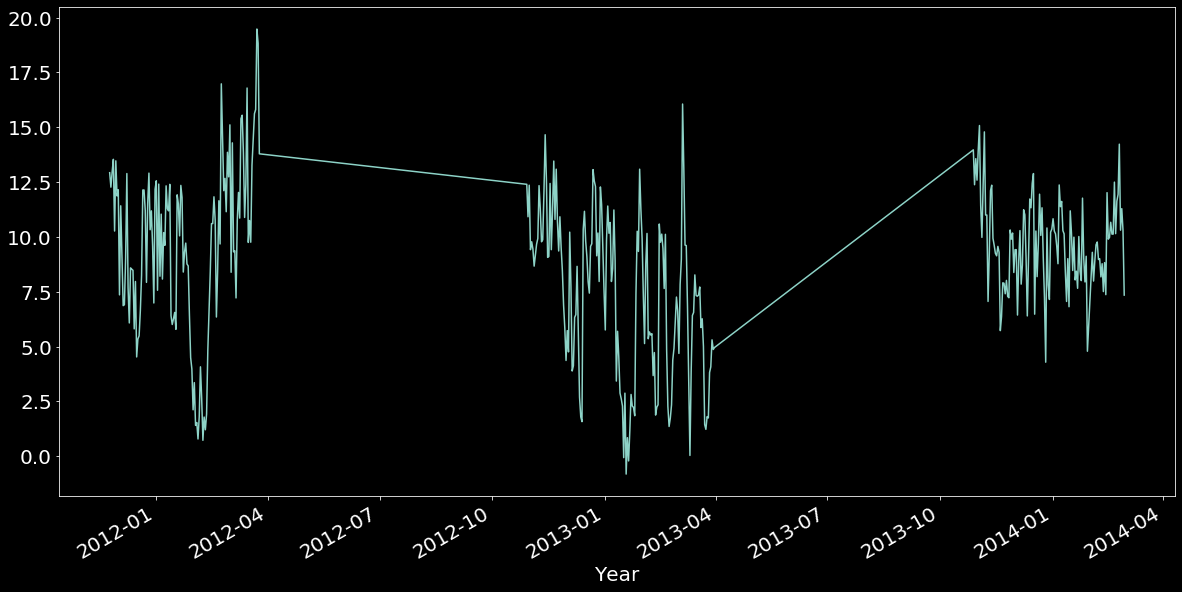

In [341]:
df_merged['temperatureHigh'].plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('time', fontsize=20);

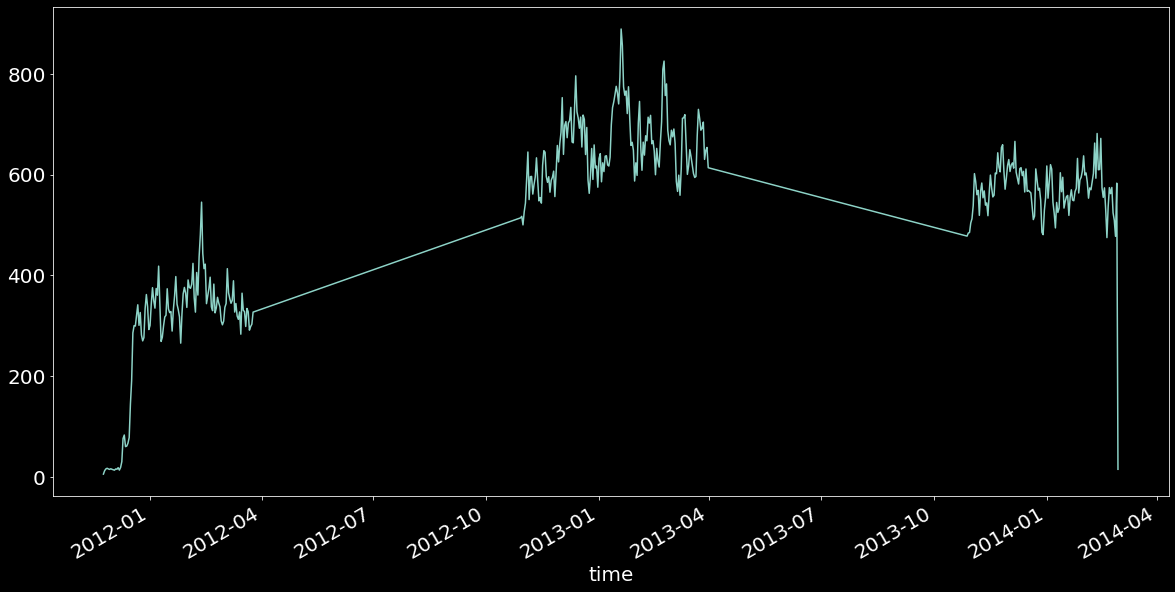

In [343]:
df_merged['energy_sum'].plot(figsize=(20,10), linewidth=1.5, fontsize=20)
plt.xlabel('time', fontsize=20);

## Task 7
Discuss what observations can be made from the plot with the combined data vs the plots from the individual datasets. 

- The data has been 'filtered' in a sense. Now both data sets reflect the same points that they BOTH share (union).
- An interesting obersvation that can be made:
    * For the overlapping dates, the temperature was generally lower while the energy used was higher (middle points)
    * The leftmost points indicate that the temperature was at its highest while the energy usage was at its lowest
    * The rightmost points indicate a slightly more balanced out fluctuation compared to the others.